Mounted at /content/drive
Shivam_Prajapati
No. of .wav files in audio folder =  71
Shivam_Prajapati_1
Shivam_Prajapati_1.jpg
y shape (1000, 1000, 1)
x, sr tpes <class 'numpy.ndarray'> <class 'int'>
x shape and sr (315648,) 44100
(1025, 617)
<class 'numpy.ndarray'>
(1000, 1000, 1)
layer 0 shape (1000, 1000)
layer 1 shape (1000, 1000)
Shivam_Prajapati_2
Shivam_Prajapati_2.jpg
y shape (1000, 1000, 1)
x, sr tpes <class 'numpy.ndarray'> <class 'int'>
x shape and sr (273024,) 44100
(1025, 534)
<class 'numpy.ndarray'>
(1000, 1000, 1)
layer 0 shape (1000, 1000)
layer 1 shape (1000, 1000)
Shivam_Prajapati_3
Shivam_Prajapati_3.jpg
y shape (1000, 1000, 1)
x, sr tpes <class 'numpy.ndarray'> <class 'int'>
x shape and sr (266112,) 44100
(1025, 520)
<class 'numpy.ndarray'>
(1000, 1000, 1)
layer 0 shape (1000, 1000)
layer 1 shape (1000, 1000)
Shivam_Prajapati_4
Shivam_Prajapati_4.jpg
y shape (1000, 1000, 1)
x, sr tpes <class 'numpy.ndarray'> <class 'int'>
x shape and sr (258048,) 44100
(1025, 505)
<cl

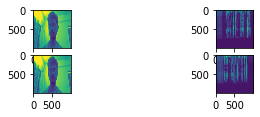

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from os import listdir
from PIL import Image
#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

from numpy import newaxis

from keras import models,layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import Dropout

from sklearn.model_selection import train_test_split
import sklearn

i=0
f=0
g=0
dataset = np.empty((65,1000,1000,2), dtype=int)
grndtruth = []
drive.mount('/content/drive')
folder_dir = "/content/drive/MyDrive/AIMLDataSet/Images/Ann_Veneman"
audio_fpath = "/content/drive/MyDrive/AIMLDataSet/Voice/Shivam"
audio_clips = os.listdir(audio_fpath)
print(audio_clips[0])
print("No. of .wav files in audio folder = ",len(audio_clips))
for images in os.listdir(folder_dir):
 
    # check if the image ends with png
    if (images.endswith(".jpg")):
        imgName = images[:-4]
        print(imgName)
        print(images)
        
        # creating a object
        im = Image.open(folder_dir+"/"+images)
        image_array = np.array(im)
        image_array = cv2.resize(image_array, dsize=(1000, 1000), interpolation=cv2.INTER_CUBIC) #learn about interpolation parameter
        image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
        image_arra = image_array[:,:,newaxis]
        y = image_arra
        plt.imshow(image_array,cmap='gray')
        print("y shape",y.shape)
        try:
          index = audio_clips.index(imgName+".wav")
        except:
          print("Skipping "+imgName)
          continue
        x, sr = librosa.load(audio_fpath+"/"+audio_clips[index], sr=44100)
        print("x, sr tpes",type(x), type(sr))
        print("x shape and sr",x.shape, sr)
        #plt.figure(figsize=(14, 5))
        #librosa.display.waveplot(x, sr=sr)
        X = librosa.stft(x)
        Xdb = librosa.amplitude_to_db(abs(X))
        #plt.figure(figsize=(14, 5))
        #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
        #plt.colorbar()
        #plt.figure(figsize=(14, 5))
        #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
        #plt.colorbar()
        print(Xdb.shape)
        audio_array = np.array(Xdb)
        audio_array = cv2.resize(audio_array, dsize=(1000, 1000), interpolation=cv2.INTER_CUBIC)
        print(type(audio_array))
        #plt.figure(figsize=(14, 5))
        #librosa.display.specshow(audio_array, sr=sr, x_axis='time', y_axis='log')
        audio_array = audio_array + 100
        #plt.imshow(audio_array)
        aud_array = audio_array[:,:,newaxis]
        y = np.dstack((y,aud_array))
        dataset[i] = y
       # dataset = dataset.append(dataset,y)

        grndtruth.append(imgName[:-2])

        #print(aud_array)
        print(aud_array.shape)
        #plt.subplot(6,2,i*2+1)
        #plt.imshow(dataset[i,:,:,0],cmap='gray')
        print("layer 0 shape",dataset[i,:,:,0].shape)
        #plt.figure(figsize=(14, 5))
        #librosa.display.specshow(dataset[i,:,:,1], sr=sr, x_axis='time', y_axis='log')
        #plt.subplot(6,2,i*2+2)
        #plt.imshow(dataset[i,:,:,1])
        print("layer 1 shape",dataset[i,:,:,1].shape)
        #plt.subplot(4,4,i)
        #plt.imshow(image_array,cmap='gray')
        i+=1
plt.subplot(5,2,1)
plt.imshow(dataset[0,:,:,0])
plt.subplot(5,2,2)
plt.imshow(dataset[0,:,:,1])
plt.subplot(5,2,3)
plt.imshow(dataset[1,:,:,0])
plt.subplot(5,2,4)
plt.imshow(dataset[1,:,:,1])
print(y.shape)    
im.show()
print(grndtruth)
print(dataset.shape)

In [ ]:

for images in os.listdir(audio_fpath):
        imgName = images[:-4]
        print(imgName)
        print(images)
        grndtruth.append(imgName[:-2])

In [ ]:
print(len(grndtruth))

65


In [ ]:
print(grndtruth)
print(dataset.shape)

['Shivam_Prajapati', 'Shivam_Prajapati', 'Shivam_Prajapati', 'Shivam_Prajapati', 'Shivam_Prajapati', 'Rajot_Saha', 'Rajot_Saha', 'Rajot_Saha', 'Rajot_Saha', 'Rajot_Saha', 'Atharv_Wani', 'Atharv_Wani', 'Atharv_Wani', 'Atharv_Wani', 'Atharv_Wani', 'vaibhav_porwal', 'vaibhav_porwal']
(20, 1000, 1000, 2)


Shivam_Prajapati_5.mp3
No. of .wav files in audio folder =  5


In [ ]:
x, sr = librosa.load(audio_fpath+"/"+audio_clips[0], sr=44100)

print(type(x), type(sr))
print(x.shape, sr)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


<class 'numpy.ndarray'> <class 'int'>
(315648,) 44100


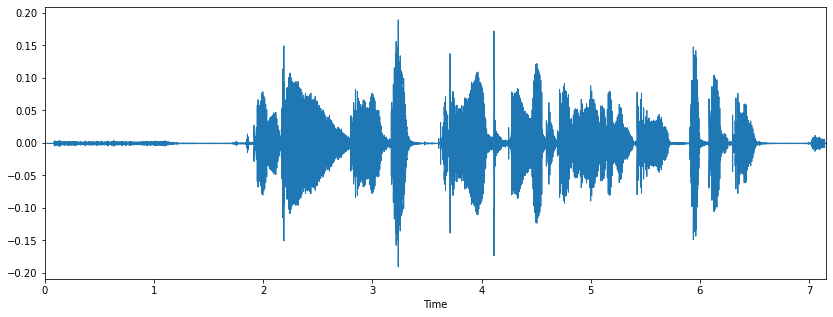

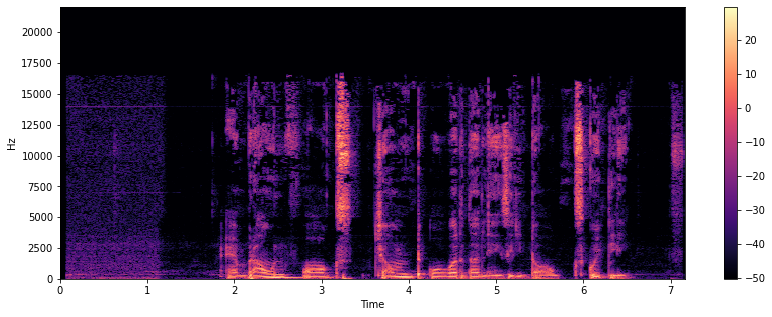

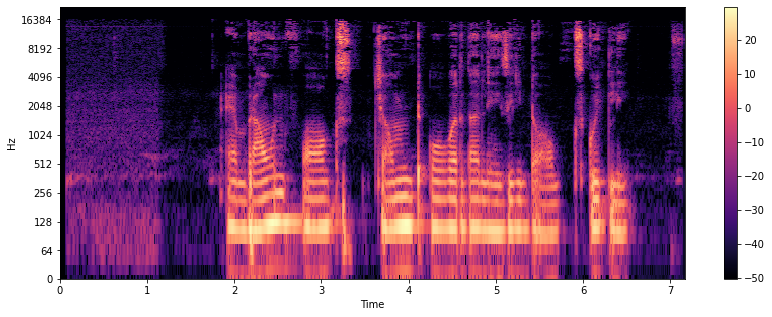

(1025, 617)
<class 'numpy.ndarray'>
[[[49.696182]
  [49.696182]
  [49.696182]
  ...
  [62.743584]
  [58.552032]
  [54.558037]]

 [[49.696182]
  [49.696182]
  [49.696182]
  ...
  [59.580185]
  [56.400646]
  [53.998264]]

 [[49.696182]
  [49.696182]
  [49.696182]
  ...
  [62.880356]
  [58.228817]
  [54.618828]]

 ...

 [[49.696182]
  [49.696182]
  [49.696182]
  ...
  [49.696182]
  [49.696182]
  [49.696182]]

 [[49.696182]
  [49.696182]
  [49.696182]
  ...
  [49.696182]
  [49.696182]
  [49.696182]]

 [[49.696182]
  [49.696182]
  [49.696182]
  ...
  [49.696182]
  [49.696182]
  [49.696182]]]
(1000, 1000, 1)


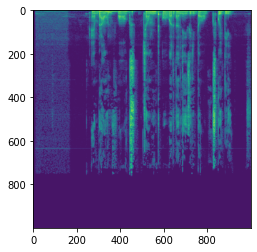

In [ ]:
from numpy import newaxis
print(Xdb.shape)
audio_array = np.array(Xdb)
audio_array = cv2.resize(audio_array, dsize=(1000, 1000), interpolation=cv2.INTER_CUBIC)
print(type(audio_array))

audio_array = audio_array + 100
plt.imshow(audio_array)
aud = audio_array[:,:,newaxis]
print(aud)
print(aud.shape)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(1000, 1000, 1)
(1000, 1000, 16)


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(1000, 1000, 1)
(1000, 1000, 17)


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(1000, 1000, 1)
(1000, 1000, 18)


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(1000, 1000, 1)
(1000, 1000, 19)


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1000, 1000, 1)
(1000, 1000, 20)
(1000, 1000, 20)


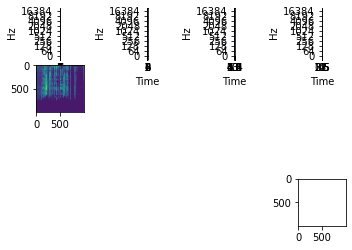

In [ ]:

i=0
for audios in audio_clips:
 
    # check if the image ends with png
    #if (images.endswith(".jpg")):
    #print(audios)
        
        # creating a object
    x, sr = librosa.load(audio_fpath+"/"+audio_clips[i], sr=44100)

    #print(type(x), type(sr))
    #print(x.shape, sr)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    audio_array = np.array(Xdb)
    audio_array = cv2.resize(audio_array, dsize=(1000, 1000), interpolation=cv2.INTER_CUBIC)    #Why log transform required
    audio_array = audio_array + 100
    plt.subplot(4,4,i+1)
    plt.imshow(audio_array)
    #plt.imshow(audio_array)
    audio_array = audio_array[:,:,newaxis]
    print(audio_array.shape)
    y = np.dstack((y,audio_array))
    print(y.shape)
    
    
    i+=1
plt.subplot(4,4,16)
plt.imshow(y[:,:,3:6])
print(y.shape)    
im.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(500, 500, 2) Shivam_Prajapati_1
(500, 500, 2) Shivam_Prajapati_2
(500, 500, 2) Shivam_Prajapati_3
(500, 500, 2) Shivam_Prajapati_4
(500, 500, 2) Shivam_Prajapati_5
(500, 500, 2) Atharv_Wani_4
(500, 500, 2) Atharv_Wani_3
(500, 500, 2) Atharv_Wani_2
(500, 500, 2) Atharv_Wani_1
(500, 500, 2) Atharv_Wani_5
(500, 500, 2) sahil_sharma_1
(500, 500, 2) sahil_sharma_2
(500, 500, 2) sahil_sharma_3
(500, 500, 2) sahil_sharma_4
(500, 500, 2) sahil_sharma_5
(500, 500, 2) ameya_mahadev_gonal_1
(500, 500, 2) ameya_mahadev_gonal_2
(500, 500, 2) vaibhav_porwal_1
(500, 500, 2) vaibhav_porwal_2
(500, 500, 2) vaibhav_porwal_3
(500, 500, 2) vaibhav_porwal_4
(500, 500, 2) vaibhav_porwal_5
(500, 500, 2) rishabh_sharma_1
(500, 500, 2) rishabh_sharma_2
(500, 500, 2) rishabh_sharma_3
(500, 500, 2) rishabh_sharma_4
(500, 500, 2) rishabh_sharma_5
(500, 500, 2) anurag_ashish_khot_1
(500

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(500, 500, 2) TarunSrivatsa_VS_2
(500, 500, 2) OS_Sumukh_2


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(500, 500, 2) TarunSrivatsa_VS_3
(500, 500, 2) OS_Sumukh_3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(500, 500, 2) TarunSrivatsa_VS_4
(500, 500, 2) OS_Sumukh_4


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(500, 500, 2) TarunSrivatsa_VS_5
(500, 500, 2) OS_Sumukh_5


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(500, 500, 2) TarunSrivatsa_VS_1
(500, 500, 2) sri_vishnu_1
(500, 500, 2) sri_vishnu_2
(500, 500, 2) sri_vishnu_3
(500, 500, 2) sri_vishnu_4
(500, 500, 2) sri_vishnu_5
(500, 500, 2) Rajot_Saha_2
(500, 500, 2) Rajot_Saha_1
(500, 500, 2) harshit_handa_2
(500, 500, 2) ameya_mahadev_gonal_3
(500, 500, 2) ameya_mahadev_gonal_4
yshape (500, 500, 2)
['Shivam_Prajapati', 'Shivam_Prajapati', 'Shivam_Prajapati', 'Shivam_Prajapati', 'Shivam_Prajapati', 'Atharv_Wani', 'Atharv_Wani', 'Atharv_Wani', 'Atharv_Wani', 'Atharv_Wani', 'sahil_sharma', 'sahil_sharma', 'sahil_sharma', 'sahil_sharma', 'sahil_sharma', 'ameya_mahadev_gonal', 'ameya_mahadev_gonal', 'vaibhav_porwal', 'vaibhav_porwal', 'vaibhav_porwal', 'vaibhav_porwal', 'vaibhav_porwal', 'rishabh_sharma', 'rishabh_sharma', 'rishabh_sharma', 'rishabh_sharma', 'rishabh_sharma', 'anurag_ashish_khot', 'anurag_ashish_khot', 'anurag_ashish_khot', 'anurag_ashish_khot', 'anurag_ashish_khot', 'akshay_a_kumar', 'akshay_a_kumar', 'akshay_a_kumar', 'akshay_a

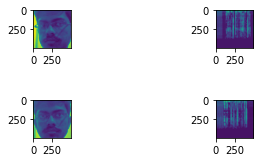

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from os import listdir
from PIL import Image
#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

from numpy import newaxis
import keras
from keras import models,layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import Dropout

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import sklearn

i=0
xtri=0
xtei=0
f=0
g=0
ds_size=85
dataset = np.empty((ds_size,500,500,2), dtype=int)
xtr = np.empty((int(ds_size*0.8),500,500,2), dtype=int)
xte = np.empty((int(ds_size*0.2),500,500,2), dtype=int)
tegt = []
trgt = []
grndtruth = []
drive.mount('/content/drive')
folder_dir = "/content/drive/MyDrive/AIMLDataSet/Images/cropp_img/"
audio_fpath = "/content/drive/MyDrive/AIMLDataSet/Voice/"
audio_clips = os.listdir(audio_fpath)
#print(audio_clips[0])
#print("No. of .wav files in audio folder = ",len(audio_clips))
for images in os.listdir(folder_dir):
 
    # check if the image ends with png
    if (images.endswith(".jpg")):
        imgName = images[:-4]
        # print(imgName)
        # print(images)
        
        # creating a object
        im = Image.open(folder_dir+"/"+images)
        image_array = np.array(im)
        image_array = cv2.resize(image_array, dsize=(500, 500), interpolation=cv2.INTER_CUBIC) #learn about interpolation parameter
        image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
        image_arra = image_array[:,:,newaxis]
        y = image_arra
        #y = y/255.0
        #print(y)
        #plt.imshow(image_array,cmap='gray')
        # print("y shape",y.shape)
        #print(imgName)
        try:
          index = audio_clips.index(imgName+".wav")
        except:
          print("Skipping "+imgName)
          continue
        x, sr = librosa.load(audio_fpath+"/"+audio_clips[index], sr=44100)
        # print("x, sr tpes",type(x), type(sr))
        # print("x shape and sr",x.shape, sr)
        #plt.figure(figsize=(14, 5))
        #librosa.display.waveplot(x, sr=sr)
        X = librosa.stft(x)
        Xdb = librosa.amplitude_to_db(abs(X))
        #plt.figure(figsize=(14, 5))
        #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
        #plt.colorbar()
        #plt.figure(figsize=(14, 5))
        #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
        #plt.colorbar()
        #print(Xdb.shape)
        audio_array = np.array(Xdb)
        audio_array = cv2.resize(audio_array, dsize=(500, 500), interpolation=cv2.INTER_CUBIC)
        #print(type(audio_array))
        #plt.figure(figsize=(14, 5))
        #librosa.display.specshow(audio_array, sr=sr, x_axis='time', y_axis='log')
        audio_array = audio_array + 100
        #audio_array = audio_array/200.0
        #print(audio_array)
        #plt.imshow(audio_array)
        aud_array = audio_array[:,:,newaxis]
        y = np.dstack((y,aud_array))
        print(y.shape,imgName)
        dataset[i] = y
       # dataset = dataset.append(dataset,y)

        grndtruth.append(imgName[:-2])
        if(imgName[-1]=="5"):
          xte[xtei]=y
          xtei+=1
          tegt.append(imgName[:-2])
        else:
          xtr[xtri]=y
          xtri+=1
          trgt.append(imgName[:-2])
        #print(aud_array)
        #print(aud_array.shape)
        #plt.subplot(6,2,i*2+1)
        #plt.imshow(dataset[i,:,:,0],cmap='gray')
        #print("layer 0 shape",dataset[i,:,:,0].shape)
        #plt.figure(figsize=(14, 5))
        #librosa.display.specshow(dataset[i,:,:,1], sr=sr, x_axis='time', y_axis='log')
        #plt.subplot(6,2,i*2+2)
        #plt.imshow(dataset[i,:,:,1])
        #print("layer 1 shape",dataset[i,:,:,1].shape)
        #plt.subplot(4,4,i)
        #plt.imshow(image_array,cmap='gray')
        i+=1
plt.subplot(5,2,1)
plt.imshow(dataset[0,:,:,0])
plt.subplot(5,2,2)
plt.imshow(dataset[0,:,:,1])
plt.subplot(5,2,5)
plt.imshow(dataset[1,:,:,0])
plt.subplot(5,2,6)
plt.imshow(dataset[1,:,:,1])
print("yshape",y.shape)    
im.show()
print(grndtruth)
print("dataset hape",dataset.shape)
print("xtr hape",xtr.shape)
print("xte hape",xte.shape)
print(trgt)
print("trgt hape",len(trgt))
print(tegt)
print("tegt hape",len(tegt))

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(17,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 32)      608       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 249, 249, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 60, 128)      0

In [ ]:
encoder = LabelBinarizer()
transformed_label = encoder.fit_transform(grndtruth)
print(transformed_label)

map = {}
for i in range(len(transformed_label)):
  st = ""
  for j in transformed_label[i]:
    st+=str(j)
  if(st not in map):
    map[st] = grndtruth[i]
print(map)
print(type(transformed_label),type(transformed_label[0]),type(transformed_label[0][0]))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'00010000000000000': 'Shivam_Prajapati', '10000000000000000': 'Atharv_Wani', '00000000000000100': 'sahil_sharma', '00000010000000000': 'ameya_mahadev_gonal', '00000000000000001': 'vaibhav_porwal', '00000000000001000': 'rishabh_sharma', '00000001000000000': 'anurag_ashish_khot', '00000100000000000': 'akshay_a_kumar', '00000000100000000': 'ayush_gupta', '00000000010000000': 'charan_sai', '00000000001000000': 'chirag_baliga', '00000000000100000': 'harshit_handa', '00000000000010000': 'ketan_vaish', '00100000000000000': 'Rajot_Saha', '01000000000000000': 'OS_Sumukh', '00001000000000000': 'TarunSrivatsa_VS', '00000000000000010': 'sri_vishnu'}
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.int64'>


In [ ]:
transtegt = np.empty((int(ds_size*0.2),(int(ds_size*0.2))), dtype=int)
transtrgt = np.empty((int(ds_size*0.8),(int(ds_size*0.2))), dtype=int)
l = np.empty((int(ds_size*0.2)), dtype=int)
for i in range(len(trgt)):
  print(trgt[i])
  id = (list(map.keys())[list(map.values()).index(trgt[i])])
  k=0
  for j in id:
    l[k] = ord(j)-48
    k+=1
  transtrgt[i] = l

for i in range(len(tegt)):
  print(tegt[i])
  id = (list(map.keys())[list(map.values()).index(tegt[i])])
  k=0
  for j in id:
    l[k] = ord(j)-48
    k+=1
  transtegt[i] = l

print(transtegt)
print(transtrgt)

Shivam_Prajapati
Shivam_Prajapati
Shivam_Prajapati
Shivam_Prajapati
Atharv_Wani
Atharv_Wani
Atharv_Wani
Atharv_Wani
sahil_sharma
sahil_sharma
sahil_sharma
sahil_sharma
ameya_mahadev_gonal
ameya_mahadev_gonal
vaibhav_porwal
vaibhav_porwal
vaibhav_porwal
vaibhav_porwal
rishabh_sharma
rishabh_sharma
rishabh_sharma
rishabh_sharma
anurag_ashish_khot
anurag_ashish_khot
anurag_ashish_khot
anurag_ashish_khot
akshay_a_kumar
akshay_a_kumar
akshay_a_kumar
akshay_a_kumar
ayush_gupta
ayush_gupta
ayush_gupta
ayush_gupta
charan_sai
charan_sai
charan_sai
charan_sai
chirag_baliga
chirag_baliga
chirag_baliga
chirag_baliga
harshit_handa
harshit_handa
harshit_handa
ketan_vaish
ketan_vaish
ketan_vaish
ketan_vaish
Rajot_Saha
Rajot_Saha
OS_Sumukh
TarunSrivatsa_VS
OS_Sumukh
TarunSrivatsa_VS
OS_Sumukh
TarunSrivatsa_VS
OS_Sumukh
TarunSrivatsa_VS
sri_vishnu
sri_vishnu
sri_vishnu
sri_vishnu
Rajot_Saha
Rajot_Saha
harshit_handa
ameya_mahadev_gonal
ameya_mahadev_gonal
Shivam_Prajapati
Atharv_Wani
sahil_sharma
vaibha

In [ ]:

import tensorflow as tf
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.00019, beta_1=0.9, beta_2=0.999)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
label = np.array(grndtruth)

dataset = dataset/255.0
xte = xte/255.0
xtr = xtr/255.0

x_train, x_test, y_train, y_test = train_test_split(dataset, transformed_label)
history = model.fit(xtr, transtrgt, batch_size=32, epochs=25,validation_data=(xte, transtegt))

op = np.rint(model.predict(x_test[0:5])).astype('int32')

for i in range(len(op)):
  st = ""
  for j in op[i]:
    st+=str(j)
  if(st in map):
    print(map[st])
  else:
    print("Unknown")

op1 = y_test[0:5]
for i in range(len(op1)):
  st = ""
  for j in op1[i]:
    st+=str(j)
  if(st in map):
    print(map[st])
  else:
    print("Unknown")

Epoch 1/25
3/3 [==============================] - 7s 962ms/step - loss: 7.7796 - accuracy: 0.0147 - val_loss: 3.2929 - val_accuracy: 0.0588
Epoch 2/25
3/3 [==============================] - 1s 184ms/step - loss: 3.1562 - accuracy: 0.0735 - val_loss: 2.7978 - val_accuracy: 0.0588
Epoch 3/25
3/3 [==============================] - 1s 184ms/step - loss: 2.7772 - accuracy: 0.1176 - val_loss: 2.6662 - val_accuracy: 0.1176
Epoch 4/25
3/3 [==============================] - 1s 191ms/step - loss: 2.6036 - accuracy: 0.2647 - val_loss: 2.5215 - val_accuracy: 0.3529
Epoch 5/25
3/3 [==============================] - 1s 185ms/step - loss: 2.4119 - accuracy: 0.3824 - val_loss: 2.3037 - val_accuracy: 0.2353
Epoch 6/25
3/3 [==============================] - 1s 181ms/step - loss: 2.0735 - accuracy: 0.3971 - val_loss: 2.1321 - val_accuracy: 0.4118
Epoch 7/25
3/3 [==============================] - 1s 184ms/step - loss: 1.8319 - accuracy: 0.4559 - val_loss: 1.8333 - val_accuracy: 0.3529
Epoch 8/25
3/3 [====

In [ ]:
tx = x_test[0:5]
op = np.rint(model.predict(tx)).astype('int32')

for i in range(len(op)):
  st = ""
  for j in op[i]:
    st+=str(j)
  if(st in map):
    print(map[st])
  else:
    print("Unknown")

op1 = y_test[0:5]
print(op1)
for i in range(len(op1)):
  st = ""
  for j in op1[i]:
    st+=str(j)
  if(st in map):
    print(map[st])
  else:
    print("Unknown")

chirag_baliga
anurag_ashish_khot
ameya_mahadev_gonal
sri_vishnu
rishabh_sharma
[[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]]
chirag_baliga
anurag_ashish_khot
ameya_mahadev_gonal
sri_vishnu
rishabh_sharma


1/1 - 1s - loss: 0.1845 - accuracy: 0.9545 - 875ms/epoch - 875ms/step


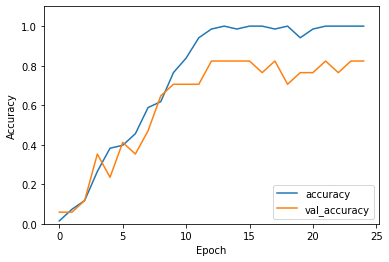

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

1/1 - 0s - loss: 0.1845 - accuracy: 0.9545 - 115ms/epoch - 115ms/step


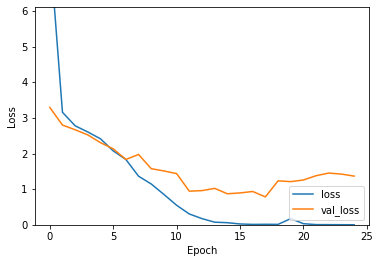

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 6.1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [ ]:
model.save("/content/drive/MyDrive/AIMLDataSet/Model82Class17Fixed.h5")

In [ ]:

#code for cropping the faces

from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from os import listdir
from PIL import Image
drive.mount('/content/drive')
folder_dir = "/content/drive/MyDrive/AIMLDataSet/Images/"

for images in os.listdir(folder_dir+"/ToBeCropped/"):
# Read the input image
  if (images.endswith(".jpg")):
    img = cv2.imread(folder_dir+"/"+images)
#     # Convert into grayscale

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Load the cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
      
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
      
    # Draw rectangle around the faces and crop the faces
    for (x, y, w, h) in faces:
        faces = img[y:y + h, x:x + w]
        plt.imshow(faces)

    try:
      cv2.imwrite(folder_dir+"/NewCropped/"+images,faces)
      print("Done")
    except:
      print("No")
      pass
    cv2.waitKey()
          
    # Display the output
    

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
